# Setup

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("articles_2017-09-01_2017-09-30.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
171a1db515d4d4f81e9cdaefacdb8dba16c93b75,https://www.economist.com/news/middle-east-and...,Kenya’s high court annuls the presidential ele...,2017-09-01 14:15:09.267,2017-09-01,312,15.020862,2017-09-01T18:48:02.383Z,51,177,84,The Economist,economist_com,0,10099,33.0,False,NaN,NaN,1825
ea4e6959acdbcf288c76f9d25ac6baefb6410463,http://www.foxnews.com/us/2017/08/31/atlantic-...,Atlantic hurricane season 2017: What you shoul...,2017-09-01 00:15:08.851,2017-09-01,85,0.484001,2017-09-01T01:30:01.288Z,7,32,46,Fox News,foxnews_com,0,599,86.0,False,NaN,NaN,285
65b41c17cbc8fe96f2eb7d3d8086fbefa0a03cf7,http://www.telegraph.co.uk/travel/ski/resort-g...,Laax: piste guide,2017-09-01 13:21:00.323,2017-09-01,1,0.000000,2017-09-01T13:34:01.749Z,0,0,1,The Telegraph,telegraph_co_uk,0,0,NaN,False,NaN,NaN,370
cf3c6ce8b392031a436a585ec7ffc2c1f94729c1,http://www.telegraph.co.uk/travel/ski/resort-g...,Laax: restaurants and entertainment,2017-09-01 13:21:02.106,2017-09-01,1,0.000000,2017-09-01T13:34:01.753Z,0,0,1,The Telegraph,telegraph_co_uk,0,0,NaN,False,NaN,NaN,370
96854242b80f8ea0c960c8a3c1b19f1f27d82db6,http://www.telegraph.co.uk/travel/ski/resort-g...,Ski Laax: resort guide,2017-09-01 13:21:02.491,2017-09-01,2,0.000000,2017-09-01T13:34:01.755Z,0,0,2,The Telegraph,telegraph_co_uk,0,0,NaN,False,NaN,NaN,370


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    152658.00
mean       1315.77
std        9625.56
min           0.00
50%          26.00
75%         266.00
90%        1717.00
95%        4658.00
99%       24236.33
99.5%     42666.43
99.9%    114308.39
max     1143483.00
Name: fb_engagements, dtype: float64

There's a few articles there with 1 million plus engagements, let's just double check that.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
a85688580da47024b77bb7e8718eb06ebbda917a,https://www.nytimes.com/2017/09/07/us/harvey-i...,"Harvey and Irma, Married 75 Years, Marvel at t...",2017-09-07 19:33:01.260,2017-09-07 19:32:07,1143483,1005.42,2017-09-08T01:59:59.960Z,45548,956285,141650,New York Times,nytimes_com,0,0,nan,True,14529828.00,2017-09-07T20:25:01.000Z,120


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

Going back to the enagement counts, we see the mean is 1,315, mode is zero, median is 26, 90th percentile is 1,717, 99th percentile is 24,236, 99.5th percentile is 42,666. The standard deviation is 9,625, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [69]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk      8          28818 3320.50 3602.25
bbc_co_uk                         12116       12265072   37.00 1012.30
breitbart_com                      2472       11792580  263.50 4770.46
brexitcentral_com                    62          49203  291.50  793.60
buzzfeed_com                       2026        7582843  163.00 3742.77
cnn_com                            3444       20150473  655.00 5850.89
dailymail_co_uk                   23716       17973676   28.00  757.87
economist_com                       522         174870   44.00  335.00
evolvepolitics_com                  132         222865  537.00 1688.37
foxnews_com                        6191       18136364   41.00 2929.47
ft_com                             3250         347966    9.00  107.07
huffingtonpost_com                10566       20805259   11.00 1969.08
independent_co_uk                  6127       10609711   48.00 1731.63
indy100_com                         517        1682810  160.00 3254.95
lemonde_fr                         3883        2086707   82.00  537.40
libdemvoice_org                     134           2698   10.00   20.13
mirror_co_uk                      10010        8262666   48.00  825.44
nbcnews_com                        1710        5260240  523.00 3076.16
newstatesman_com                    749         232068   11.00  309.84
npr_org                            1986        6582394  179.00 3314.40
nytimes_com                        4934       19844645  216.00 4022.02
order-order_com                     268          94214  135.00  351.54
propublica_org                       39         142388  480.00 3650.97
reuters_com                        6047        1682993   16.00  278.32
rt_com                             2137        2641695  390.00 1236.17
skwawkbox_org                       114          36440  190.50  319.65
telegraph_co_uk                    7376        3943188   26.00  534.60
thecanary_co                        344         359005  346.00 1043.62
theguardian_com                    8567       10717627  135.00 1251.04
thetimes_co_uk                     9147         329695    1.00   36.04
washingtonpost_com                23360       15896784    0.00  680.51
westmonster_com                     289         338151   41.00 1170.07
yournewswire_com                    415         587343   97.00 1415.28

In [10]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

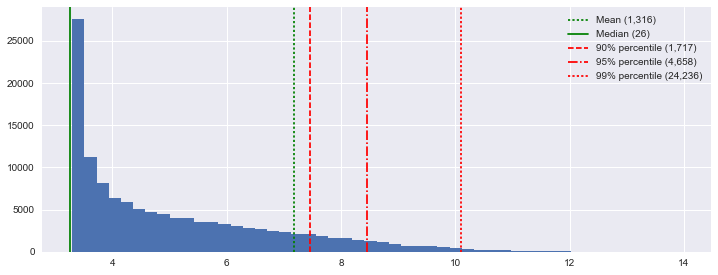

In [11]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [12]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   123953.00
mean         5.07
std          1.79
min          3.30
25%          3.56
50%          4.47
75%          6.14
max         11.65
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [13]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   123953.00
mean        11.12
std         10.73
min          0.00
25%          2.00
50%          8.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [14]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

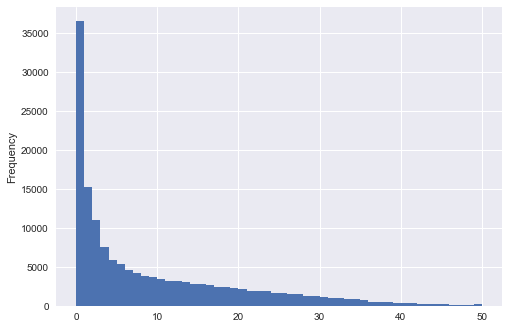

In [17]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [18]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [19]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   152658.00
mean         9.02
std         89.37
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        264.00
99.5%      564.71
99.9%     1240.72
max       7546.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [20]:
lead_articles = data[data.mins_as_lead > 0]

In [21]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   4208.00
mean     327.33
std      430.79
min        4.00
25%       84.00
50%      174.00
75%      414.25
90%      839.00
95%     1113.25
99%     1656.90
99.5%   2172.34
99.9%   4612.71
max     7546.00
Name: mins_as_lead, dtype: float64

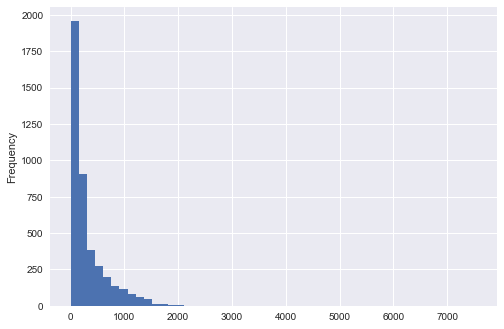

In [22]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

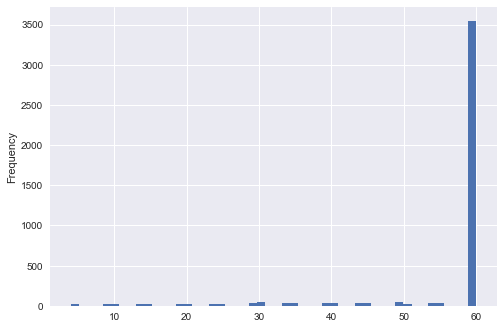

In [23]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [24]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

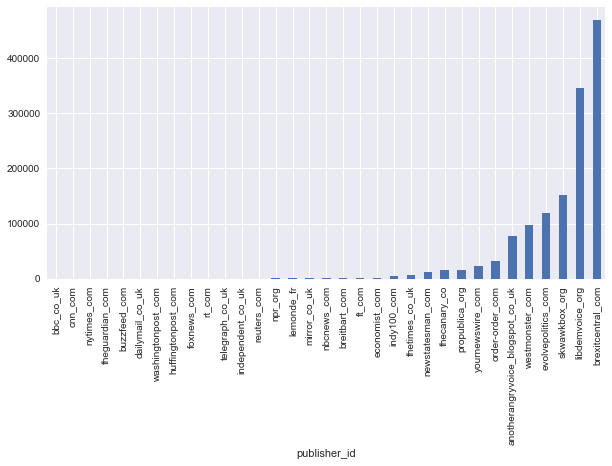

In [25]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

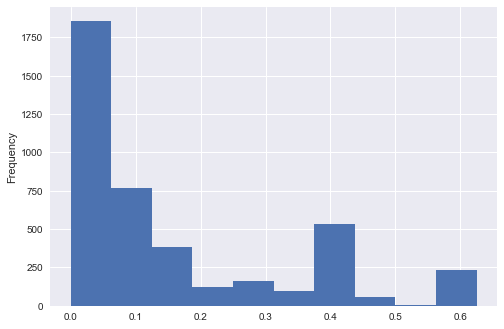

In [26]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

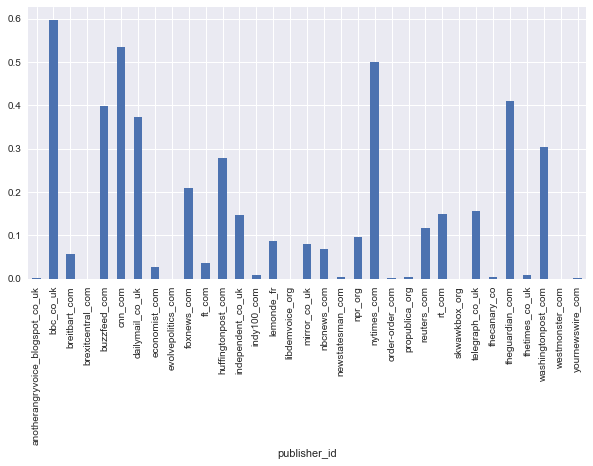

In [27]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

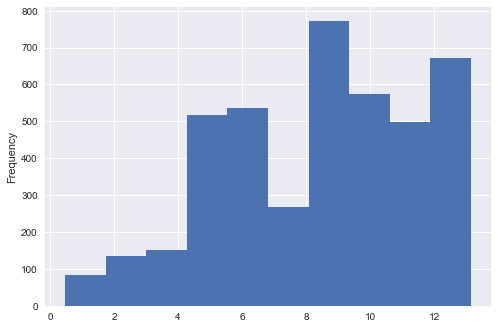

In [28]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [29]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,8.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,94.00,12.55,2.36,0.88,13.15,13.15,13.15,13.15
breitbart_com,190.00,8.40,1.21,0.58,8.69,8.69,8.69,8.69
brexitcentral_com,55.00,4.39,0.75,1.45,4.59,4.59,4.59,4.59
buzzfeed_com,270.00,11.75,1.38,1.80,12.02,12.02,12.02,12.02
cnn_com,166.00,12.04,2.68,1.07,12.89,12.89,12.89,12.89
dailymail_co_uk,150.00,11.63,1.24,1.98,11.85,11.85,11.85,11.85
economist_com,46.00,6.54,2.61,0.53,5.99,7.99,7.99,7.99
evolvepolitics_com,64.00,5.10,0.28,2.91,5.13,5.13,5.13,5.13


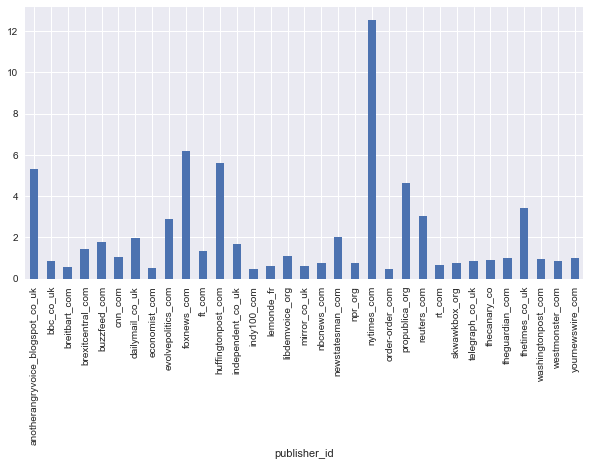

In [30]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [31]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [32]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.46948415885821004, 13.145359968846892)

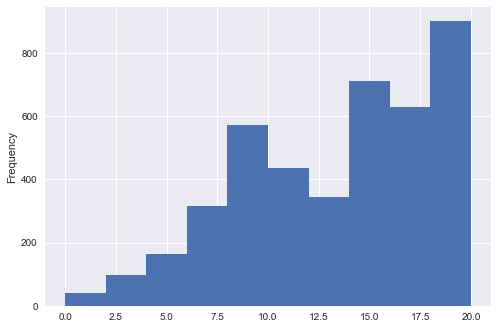

In [33]:
lead_proposal_3.plot.hist()

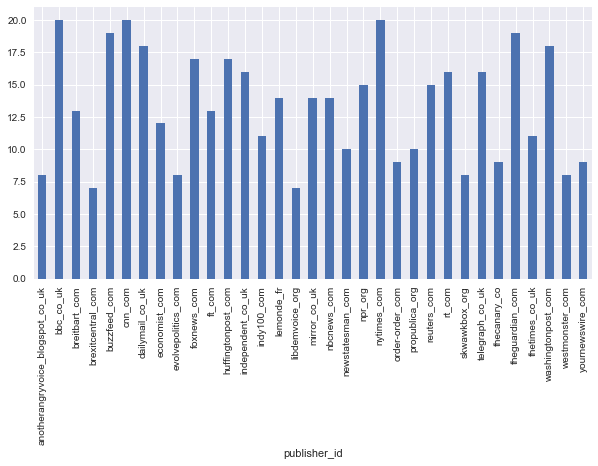

In [34]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [35]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [36]:
data.lead_score.value_counts().sort_index()

0.00     148451
1.00         41
2.00         42
3.00         56
4.00         78
5.00         85
6.00         67
7.00        247
8.00        271
9.00        300
10.00       237
11.00       199
12.00        70
13.00       274
14.00       498
15.00       214
16.00       359
17.00       269
18.00       229
19.00       383
20.00       288
Name: lead_score, dtype: int64

In [37]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      13.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  8.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         14.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [38]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [39]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

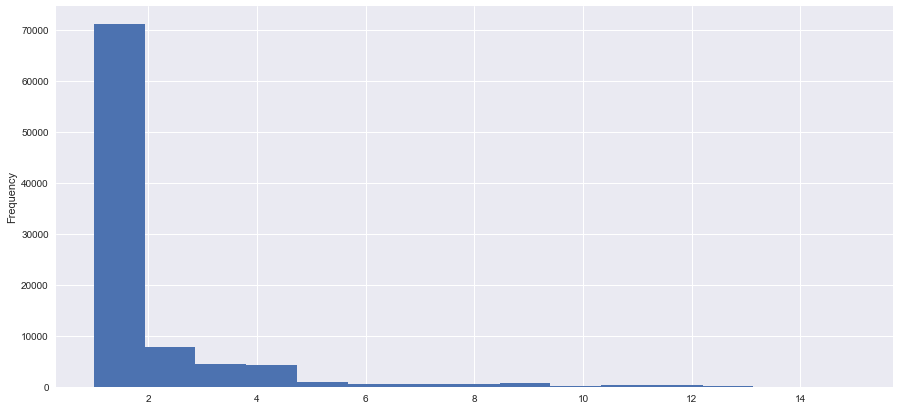

In [40]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [41]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     71064
2.00      7858
3.00      4538
4.00      4303
5.00       857
6.00       543
7.00       557
8.00       577
9.00       765
10.00      228
11.00      283
12.00      418
13.00      150
14.00       22
15.00        3
dtype: int64

In [42]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk       8.00
bbc_co_uk                          15181.00
breitbart_com                       2420.00
brexitcentral_com                     62.00
buzzfeed_com                        9582.00
cnn_com                            11168.00
dailymail_co_uk                    13797.00
economist_com                        284.00
evolvepolitics_com                   130.00
foxnews_com                         7753.00
ft_com                              3064.00
huffingtonpost_com                  7607.00
independent_co_uk                   4402.00
indy100_com                          516.00
lemonde_fr                          3787.00
libdemvoice_org                      134.00
mirror_co_uk                        9419.00
nbcnews_com                         1671.00
newstatesman_com                     694.00
npr_org                             2352.00
nytimes_com                         9407.00
order-order_com                      267.00
propublica_org     

That looks good to me.

In [43]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [44]:
data.front_score 

id
171a1db515d4d4f81e9cdaefacdb8dba16c93b75   1.00
ea4e6959acdbcf288c76f9d25ac6baefb6410463   1.00
65b41c17cbc8fe96f2eb7d3d8086fbefa0a03cf7   0.00
cf3c6ce8b392031a436a585ec7ffc2c1f94729c1   0.00
96854242b80f8ea0c960c8a3c1b19f1f27d82db6   0.00
a6768245f519a1a2dd1da633b5d9f186e66b5f86   0.00
3ab8cb96ad784c7646b327a2ff6c2fb0875a9726   0.00
5d2369b6efcae2693582b2dc4b7444c64bfcb488   0.00
1a3a69741a4e3eca3399022e9bc1c710d8df86ee   0.00
0e6649a1d87a2e67e592e7fbec5f002cbb32a44c   1.00
c31f4c3f12d749682a00fa03b8ad4eb8b2f11e27   3.00
d43c9606cd44696362eb724037818c279f29a918   0.00
05dba6d3c8d602f6ef0004b3265e30a5099479de   0.00
095c2c1a6ac01b5606dc7c540d389fa04546e3c4   0.00
5c839e9b3c6c059c43ba5b364671817115eec39b   0.00
40ab7a42b352900d4c2b01e4826b3553cf159fb3   1.00
48d50d925c7c2f68536e25de1f15429531aa47cb   1.00
600931b1ef7a8b93fa9e34f5b61a1503bd50754e   1.00
4fbb0d728589c31c533e86269389f592563e801f   0.00
db43e4bac26e26ac5eeb0ab224778e55a80a170e   1.00
ef918777a190d2a6f40b0370be447e31e4b13

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [45]:
data.fb_brand_page_likes.max()

44213994.0

In [46]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

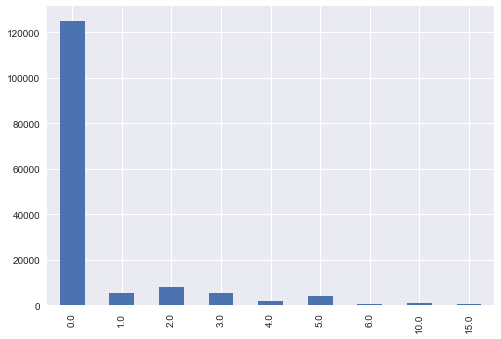

In [47]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [48]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,8.00,0.88,0.35,0.00,1.00,1.00,1.00,1.00
bbc_co_uk,12116.00,0.59,2.92,0.00,0.00,0.00,0.00,15.00
breitbart_com,2472.00,0.86,0.99,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,62.00,0.89,0.32,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,2026.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
cnn_com,3444.00,2.79,4.49,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,23716.00,0.57,1.59,0.00,0.00,0.00,0.00,5.00
economist_com,522.00,2.14,1.36,0.00,0.00,3.00,3.00,3.00
evolvepolitics_com,132.00,0.67,0.47,0.00,0.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [49]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330078.00
bbc_co_uk                          44213994.00
breitbart_com                       3680635.00
brexitcentral_com                      9347.00
buzzfeed_com                        2714356.00
cnn_com                            28782078.00
dailymail_co_uk                    12712687.00
economist_com                       8315962.00
evolvepolitics_com                   113280.00
foxnews_com                        15924468.00
ft_com                              3674434.00
huffingtonpost_com                  9753503.00
independent_co_uk                   7610080.00
indy100_com                          225454.00
lemonde_fr                          3895889.00
libdemvoice_org                        8593.00
mirror_co_uk                        2873844.00
nbcnews_com                         9302574.00
newstatesman_com                     154405.00
npr_org                             6179264.00
nytimes_com                        14688146.00


In [50]:
np.log(2149)

7.6727578966425103

In [51]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.60
breitbart_com                      15.12
brexitcentral_com                   9.14
buzzfeed_com                       14.81
cnn_com                            17.18
dailymail_co_uk                    16.36
economist_com                      15.93
evolvepolitics_com                 11.64
foxnews_com                        16.58
ft_com                             15.12
huffingtonpost_com                 16.09
independent_co_uk                  15.84
indy100_com                        12.33
lemonde_fr                         15.18
libdemvoice_org                     9.06
mirror_co_uk                       14.87
nbcnews_com                        16.05
newstatesman_com                   11.95
npr_org                            15.64
nytimes_com                        16.50
order-order_com                    10.70
propublica_org                     12.77
reuters_com                        15.17
rt_

That's more like it, but the lower numbers should be smaller.

In [52]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.70
breitbart_com                       8.21
brexitcentral_com                   2.24
buzzfeed_com                        7.91
cnn_com                            10.27
dailymail_co_uk                     9.45
economist_com                       9.03
evolvepolitics_com                  4.73
foxnews_com                         9.68
ft_com                              8.21
huffingtonpost_com                  9.19
independent_co_uk                   8.94
indy100_com                         5.42
lemonde_fr                          8.27
libdemvoice_org                     2.15
mirror_co_uk                        7.96
nbcnews_com                         9.14
newstatesman_com                    5.04
npr_org                             8.73
nytimes_com                         9.59
order-order_com                     3.79
propublica_org                      5.86
reuters_com                         8.26
rt_

In [53]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [54]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [55]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [56]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   2.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [57]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [58]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

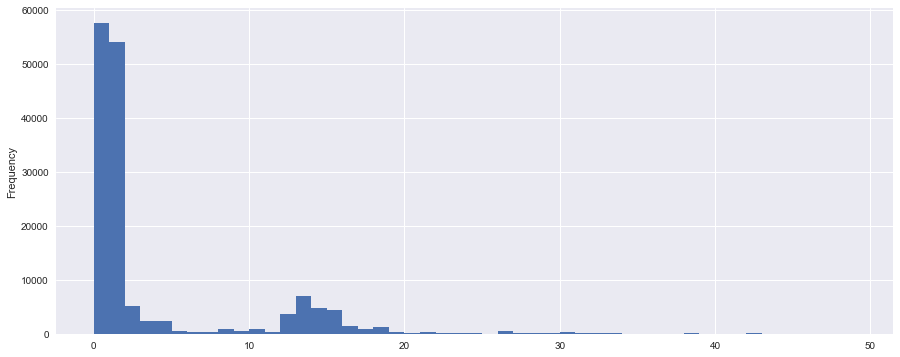

In [59]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

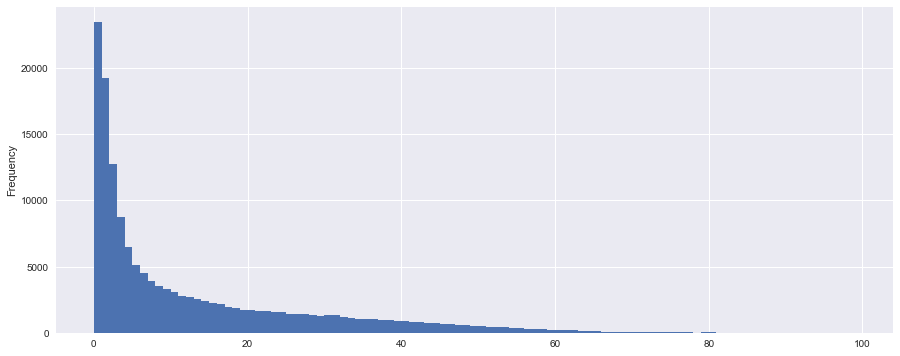

In [60]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [61]:
data.attention_index.value_counts().sort_index()

0.00     23428
1.00     19237
2.00     12755
3.00      8699
4.00      6444
5.00      5114
6.00      4503
7.00      3939
8.00      3523
9.00      3331
10.00     3043
11.00     2770
12.00     2681
13.00     2512
14.00     2433
15.00     2259
16.00     2187
17.00     1982
18.00     1884
19.00     1726
20.00     1719
21.00     1632
22.00     1647
23.00     1542
24.00     1544
25.00     1436
26.00     1429
27.00     1384
28.00     1352
29.00     1302
         ...  
66.00       93
67.00       85
68.00       76
69.00       60
70.00       34
71.00       45
72.00       53
73.00       33
74.00       35
75.00       41
76.00       32
77.00       34
78.00       19
79.00       27
80.00       34
81.00       17
82.00       21
83.00       16
84.00       18
85.00        7
86.00       15
87.00        9
88.00       19
89.00       10
90.00        5
91.00        6
92.00        7
93.00        7
94.00        6
95.00        1
Name: attention_index, Length: 96, dtype: int64

In [62]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
6067d56573cffca0809e48adf887dc244f0071bc,http://www.bbc.co.uk/news/world-asia-41275614,N Korea 'fires missile from Pyongyang',2017-09-14 22:18:02.020,2017-09-14 22:14:57.000,116513,834.83,2017-09-14T22:44:01.001Z,22667,76135,17711,...,True,43989977.00,2017-09-15T01:49:45.000Z,96,50.00,20.00,10.00,15.00,45.00,95.00
e5916f9bd62e8c6c9cb564d4d4b4ea8a99c8e1d2,http://www.cnn.com/2017/09/18/politics/paul-ma...,US government wiretapped former Trump campaign...,2017-09-18 22:57:09.206,2017-09-18 22:55:12.000,167763,540.50,2017-09-18T23:10:01.591Z,46913,97863,22987,...,True,28570339.00,2017-09-18T23:01:49.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
68f2a3b5ccfe8c92d511232c1e284f4f42852394,http://www.cnn.com/2017/09/03/politics/obama-t...,Read the Inauguration Day letter Obama left fo...,2017-09-03 12:48:16.001,2017-09-03 12:45:03.000,184591,416.92,2017-09-03T13:14:00.480Z,25453,132713,26425,...,True,28191321.00,2017-09-03T12:52:17.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
6dd1f438183f2d3b123ce529eda57ce6e1a5be97,http://www.bbc.co.uk/news/world-latin-america-...,Large earthquake strikes near Mexico,2017-09-08 05:12:00.922,2017-09-08 05:09:57.000,87552,516.50,2017-09-08T05:38:01.097Z,13470,61106,12976,...,True,43867811.00,2017-09-08T05:13:41.000Z,96,49.00,20.00,10.00,15.00,45.00,94.00
a4ec2e243a5327b4c92ac310dc8e8c028b069e1d,http://www.cnn.com/2017/09/20/americas/hurrica...,Hurricane Maria: Puerto Rico awaits direct hit,2017-09-20 09:03:20.771,2017-09-20 08:59:03.000,143472,388.67,2017-09-20T23:54:02.368Z,15363,109288,18821,...,True,28601101.00,2017-09-20T19:30:25.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
e915fdae2abc802ebd8edc374dc070ade3465019,http://www.cnn.com/2017/09/18/americas/atlanti...,Hurricane Maria forecaset to be Category 4,2017-09-18 07:51:12.471,2017-09-18 07:44:05.000,143711,484.50,2017-09-18T21:06:02.694Z,33386,88010,22315,...,True,28565647.00,2017-09-18T08:31:05.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
8e73a1eb14f6a69156ddf755d404b8a464e22ef8,http://www.cnn.com/2017/09/23/politics/nfl-goo...,FL commissioner: Trump showed 'lack of respect...,2017-09-23 14:43:16.807,2017-09-23 14:37:43.000,98752,211.70,2017-09-24T19:06:05.123Z,32897,53603,12252,...,True,28618169.00,2017-09-23T15:20:06.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
588089e0a7c0e9eabe610bf658f2d4205b31e0cc,http://www.cnn.com/2017/09/05/us/hurricane-irm...,Hurricane Irma: Florida and Puerto Rico brace ...,2017-09-05 06:57:19.474,2017-09-05 06:51:25.000,263683,257.52,2017-09-05T16:02:00.306Z,88414,144215,31054,...,True,28201804.00,2017-09-05T08:30:27.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00
c7e29470ae37b7a78df9a3d784e4f66e4ca951a2,http://www.bbc.co.uk/news/world-middle-east-41...,Saudi women 'given right to drive',2017-09-26 19:13:08.658,2017-09-26 19:09:45.000,330324,2935.87,2017-09-26T21:08:04.432Z,36855,265864,27605,...,True,44163937.00,2017-09-26T19:13:41.000Z,96,50.00,20.00,8.00,15.00,43.00,93.00


In [63]:
data["score_diff"] = data.promotion_score - data.response_score

In [64]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
b149ea3a151e68636d95ed9276493cc30e848afe,http://www.bbc.co.uk/news/world-africa-41123329,Judges annul Kenya presidential election,2017-09-01 08:54:00.852,2017-09-01 08:50:37,0,1981.84,2017-09-01T22:33:59.613Z,0,0,0,...,43741129.00,2017-09-01T09:39:04.000Z,96,0.00,20.00,8.00,15.00,43.00,43.00,43.00
dfc27a9222b7b195234505922dddcb80c81e588e,https://www.buzzfeed.com/johnpaczkowski/apple-...,Coming Up: The Biggest Announcements From Appl...,2017-09-12 12:54:19.843,2017-09-08 19:31:51,3,0.25,2017-09-12T13:08:01.784Z,0,0,3,...,2675254.00,2017-09-12T17:19:36.000Z,147,1.00,19.00,13.00,11.00,43.00,44.00,42.00
ada53b337d27f18d07e0887771e480401dcfd3e7,https://www.buzzfeed.com/johnpaczkowski/iphone...,How Apple Built An iPhone Camera That Makes Ev...,2017-09-22 13:49:20.295,2017-09-20 21:58:16,1,0.10,2017-09-22T14:00:07.330Z,0,0,1,...,2699863.00,2017-09-24T01:30:00.000Z,147,0.00,19.00,12.00,11.00,42.00,42.00,42.00
495281dd90c11682f9d07d81e498c14b7eb3c24d,https://www.buzzfeed.com/adambvary/summer-box-...,Why Hollywood Bombed So Badly This Summer,2017-09-03 16:20:05.028,2017-09-01 21:50:22,2,0.08,2017-09-03T16:34:00.954Z,0,0,2,...,2664073.00,2017-09-03T22:31:01.000Z,147,1.00,19.00,13.00,11.00,43.00,44.00,42.00
5d3a94d93655aedcc6c067b8dc6e59cdb472e92d,https://www.buzzfeed.com/jtes/women-are-spendi...,Women Are Spending Years In Prison Because Wyo...,2017-09-19 12:06:15.097,2017-09-15 20:37:05,0,0.00,2017-09-19T12:20:01.415Z,0,0,0,...,2696756.00,2017-09-20T18:34:00.000Z,147,0.00,19.00,8.00,11.00,38.00,38.00,38.00
47c7627b33e6ac909d597b753965d91ed1cdf932,https://www.buzzfeed.com/albertsamaha/they-can...,Why A Cop With A Tattoo That Looks Like A Nazi...,2017-09-22 12:07:28.784,2017-09-20 15:40:15,1,0.10,2017-09-22T12:18:10.717Z,0,0,1,...,2698893.00,2017-09-22T14:16:06.000Z,147,0.00,19.00,7.00,11.00,37.00,37.00,37.00
0feb3bc421d776d3efcbf5e4aef07fd3be80b028,http://www.dailymail.co.uk/news/article-488703...,Explosion on underground train in south London,2017-09-15 07:45:12.603,2017-09-15 07:41:53,0,194.08,2017-09-15T09:10:01.432Z,0,0,0,...,12417198.00,2017-09-15T20:00:22.000Z,158,0.00,18.00,1.00,14.00,33.00,33.00,33.00
f0e103cc56d6fb0e459bedf75d9db013d20a7bf7,https://www.buzzfeed.com/buzzfeednews/watch-am...,Watch Our New Morning Show AM To DM!,2017-09-25 12:31:22.415,2017-09-24 22:49:46,39,0.23,2017-09-25T14:42:10.589Z,1,28,10,...,2700472.00,2017-09-25T13:57:00.000Z,147,6.00,19.00,9.00,11.00,39.00,45.00,33.00
61afb108d4605bff4febdb14172eaa3ce34b8f91,http://www.dailymail.co.uk/news/article-488457...,Fights break out ahead of Cologne Arsenal match,2017-09-14 14:48:25.961,2017-09-14 14:45:23,0,244.27,2017-09-15T10:06:01.808Z,0,0,0,...,12394441.00,2017-09-14T15:30:02.000Z,158,0.00,18.00,1.00,14.00,33.00,33.00,33.00


In [65]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
847e11ad09dcdffaaf4746032ad1664a1067da8a,http://www.huffingtonpost.com/entry/if-the-pro...,"If The Protest Outrages You, But The Cause Doe...",2017-09-25 20:46:24.106,2017-09-25 20:40:30.716,109288,235.98,2017-09-27T00:20:11.580Z,15892,80756,12640,...,nan,NaN,215,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
2812dae6a98764e8b1c9b2f3fc6c370047793546,https://www.buzzfeed.com/javieraceves/las-tien...,Canadá envió 1500 tiendas de campaña y el SAT ...,2017-09-28 17:19:32.150,2017-09-28 17:10:22.000,337311,367.95,2017-09-29T03:01:05.580Z,40454,199045,97812,...,nan,NaN,147,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
bc24ca5aedc56346e619a6b1c05374338f7ff826,https://www.washingtonpost.com/local/education...,Senate panel rejects Trump’s proposed federal...,2017-09-07 22:12:09.409,2017-09-07 22:05:00.000,111176,209.29,2017-09-10T19:04:00.023Z,6724,96145,8307,...,nan,NaN,191,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
423bab68e6dbb29153f05f4036e5adf84decefc2,http://www.cnn.com/2016/01/11/entertainment/da...,"David Bowie, a master of music and makeovers, ...",2017-09-08 16:51:14.029,2017-09-08 16:46:06.000,118977,0.03,2017-09-08T18:06:02.670Z,8971,100422,9584,...,nan,NaN,105,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
0e6098488737a461a546cb6ddadc70db9c220fc3,https://www.washingtonpost.com/national/health...,Police officer who arrested Utah nurse fired f...,2017-09-05 21:39:12.763,2017-09-05 21:33:13.000,246436,2698.89,2017-09-06T00:58:01.409Z,30634,189357,26445,...,nan,NaN,191,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
2ac8e6d2202d8c603b8fb20f6b3defa24f357c61,http://www.washingtonpost.com/video/local/weat...,San Juan mayor: 'There is horror in the streets',2017-09-23 21:58:22.408,2017-09-23 20:41:42.000,109615,213.36,2017-09-25T23:04:02.843Z,15658,72891,21066,...,nan,NaN,191,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
d10e7ebabab09ec6a72423d3995796f9536c23bc,https://www.buzzfeed.com/tatianafarah/veja-30-...,Veja 30 obras da exposição censurada no Santan...,2017-09-12 21:24:18.661,2017-09-12 20:53:22.000,174607,154.33,2017-09-13T02:28:01.800Z,57836,102143,14628,...,nan,NaN,147,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
22f025d7af4929e90cbb43329af351961cbe3dbd,http://www.cnn.com/2017/09/18/americas/hurrica...,Hurricane Maria strengthens to Category 5,2017-09-19 00:03:16.021,2017-09-18 23:59:39.000,144371,1366.45,2017-09-19T03:22:00.487Z,33573,88346,22452,...,nan,NaN,105,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
3942b12bb0a8dddd8b1a5c962a5b0d2f800684d6,https://www.nytimes.com/2017/09/01/business/mi...,"Michael Dell, Tech Billionaire, Pledges $36 Mi...",2017-09-01 12:18:01.060,2017-09-01 12:16:21.000,134143,141.86,2017-09-01T16:12:00.598Z,7974,112734,13435,...,nan,NaN,120,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [66]:
data.to_csv("articles_with_provisional_scores_2017-09-01_2017-09-30.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 